<a href="https://colab.research.google.com/github/jarrodsb/DSPS_JBieber/blob/main/HW10/kerasmnist_mlp_Bieber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHYS 461 Homework 10 - Jarrod Bieber

**Finish the notebook started in class (kerasmnist.ipynb in the Labs folder) by changing the neural network we built together into a convolutional neural network (see also slides)**

---

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pylab as plt

# For Convolution Neural Network
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input # Import Input layer

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
np.unique(x_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [4]:
x_train = x_train.astype(float) / 255.
#y_train = y_train.astype(float) / 255.
x_test = x_test.astype(float) / 255.
#y_test = y_test.astype(float) / 255.

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
x_train.shape

(60000, 28, 28, 1)

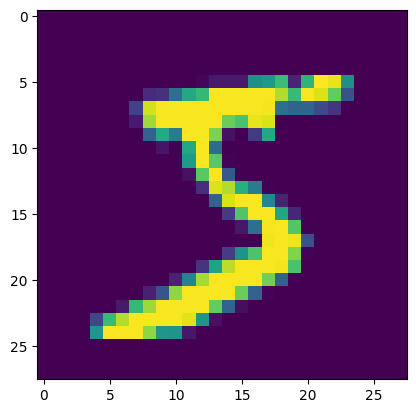

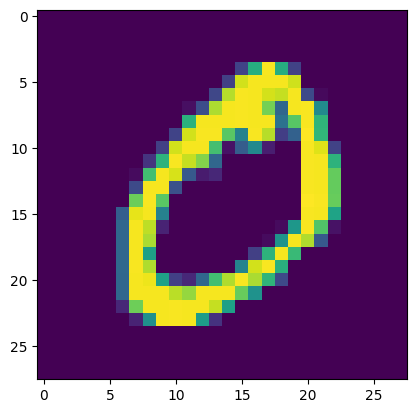

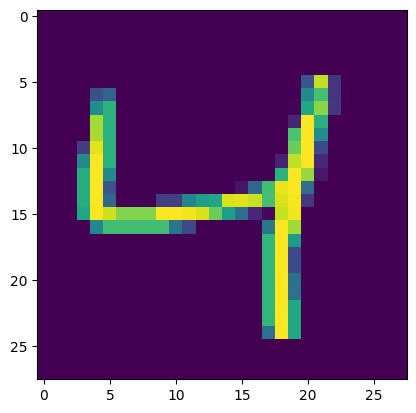

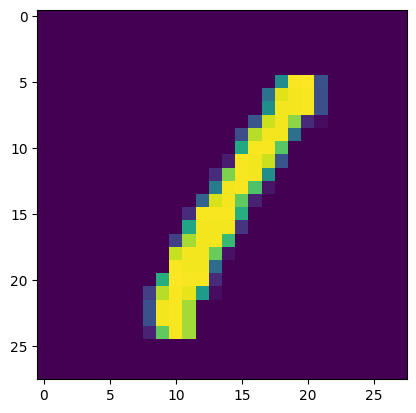

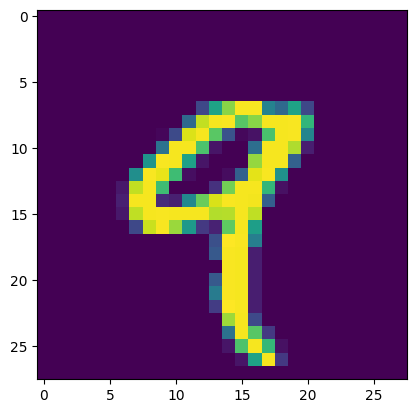

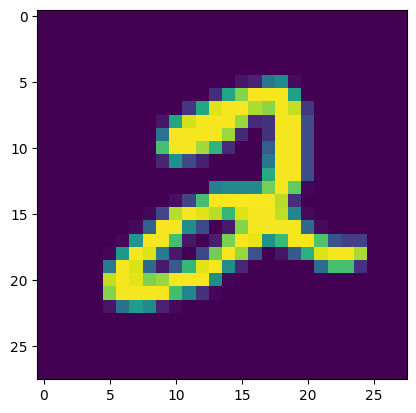

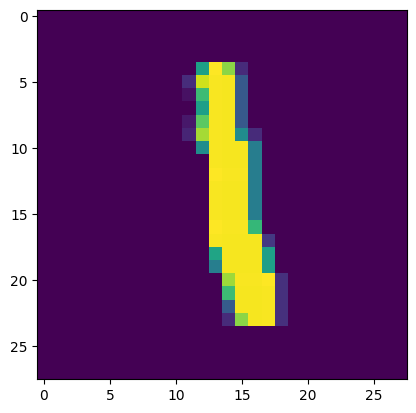

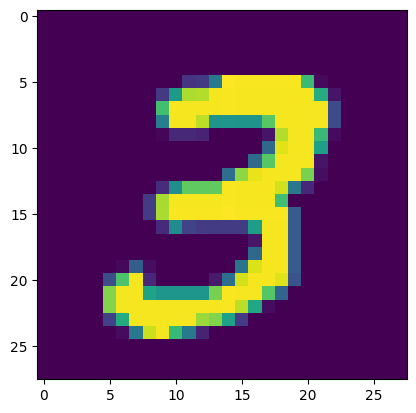

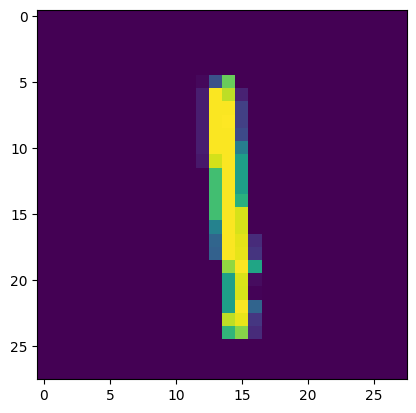

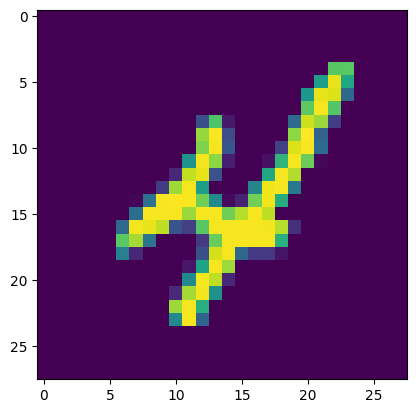

In [8]:
for i in range (10):
  plt.imshow(x_train[i])
  plt.show()

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
x_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])

In [12]:
x_trainraveled.shape

(60000, 784)

In [13]:
x_testraveled = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [14]:
x_testraveled.shape

(10000, 784)

In [15]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [16]:
mlp = keras.Sequential([
    layers.Dense(320, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

In [17]:
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = mlp.fit(x_trainraveled, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4917 - loss: 1.8212 - val_accuracy: 0.8881 - val_loss: 0.6369
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8982 - loss: 0.5251 - val_accuracy: 0.9279 - val_loss: 0.3052
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9340 - loss: 0.2781 - val_accuracy: 0.9443 - val_loss: 0.2201
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9535 - loss: 0.1875 - val_accuracy: 0.9535 - val_loss: 0.1746
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9631 - loss: 0.1445 - val_accuracy: 0.9583 - val_loss: 0.1505
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9706 - loss: 0.1138 - val_accuracy: 0.9625 - val_loss: 0.1348
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9755 - loss: 0.0940 - val_accuracy: 0.9663 - val_loss: 0.1219
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9814 - loss: 0.0726 - val_accuracy: 0.

In [19]:
history.history

{'accuracy': [0.6887555718421936,
  0.9098666906356812,
  0.9384444355964661,
  0.9541555643081665,
  0.9636666774749756,
  0.9712666869163513,
  0.9763777852058411,
  0.9811111092567444,
  0.9846000075340271,
  0.9872221946716309],
 'loss': [1.3378885984420776,
  0.4389095604419708,
  0.25529569387435913,
  0.1819494515657425,
  0.14045140147209167,
  0.1116635724902153,
  0.09108324348926544,
  0.07432638108730316,
  0.06177770346403122,
  0.051261674612760544],
 'val_accuracy': [0.8880666494369507,
  0.9278666377067566,
  0.9443333148956299,
  0.9535333514213562,
  0.9582666754722595,
  0.9624666571617126,
  0.9662666916847229,
  0.9674666523933411,
  0.9680666923522949,
  0.9698666930198669],
 'val_loss': [0.636928141117096,
  0.30521321296691895,
  0.2201458066701889,
  0.1746119111776352,
  0.15053600072860718,
  0.1347936987876892,
  0.12194859981536865,
  0.11235396564006805,
  0.11282968521118164,
  0.10757974535226822]}

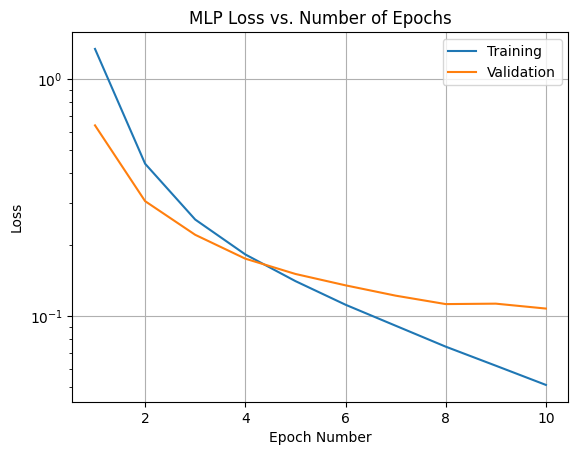

In [20]:
num_epochs = len(history.history['loss'])
epochs_range = range(1, num_epochs + 1)

plt.plot(epochs_range, history.history['loss'], label="Training")
plt.plot(epochs_range, history.history['val_loss'], label="Validation")
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('MLP Loss vs. Number of Epochs')
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()

**Figure 1:** A plot of the loss value measured by our Training and Validation data after being trained by a Multi-Layer Perceptron (MLP) model over a series of epochs (iterations). Our training data was a 2D-array representing flattened images displayed earlier in the notebook, with one-hot encoded labels applied to the data. 25% of the training data was set aside for validation, and the model was iterated up to 10 times. We see that the loss value decreases (improves) with each successive epoch, but after 4 epochs the Training data does better than the Validation data (overfitting).

In [21]:
mlp.evaluate(x_testraveled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9693 - loss: 0.1068


[0.09362895786762238, 0.9739999771118164]

## Convolution Neural Network:

In [22]:
input_shape = (28, 28, 1) # Define input_shape

model = Sequential([
    Input(shape=input_shape), # Use Input layer as the first layer
    Conv2D(32, kernel_size=(10, 10), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
cnn_history = model.fit(x_train, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8162 - loss: 0.6138 - val_accuracy: 0.9596 - val_loss: 0.1351
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9714 - loss: 0.0980 - val_accuracy: 0.9749 - val_loss: 0.0809
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9811 - loss: 0.0603 - val_accuracy: 0.9811 - val_loss: 0.0636
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9866 - loss: 0.0446 - val_accuracy: 0.9816 - val_loss: 0.0624
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9889 - loss: 0.0364 - val_accuracy: 0.9850 - val_loss: 0.0512
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9912 - loss: 0.0297 - val_accuracy: 0.9846 - val_loss: 0.0528
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9909 - loss: 0.0271 - val_accuracy: 0.9857 - val_loss: 0.0470
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9919 - loss: 0.0230 - val_accuracy: 0.

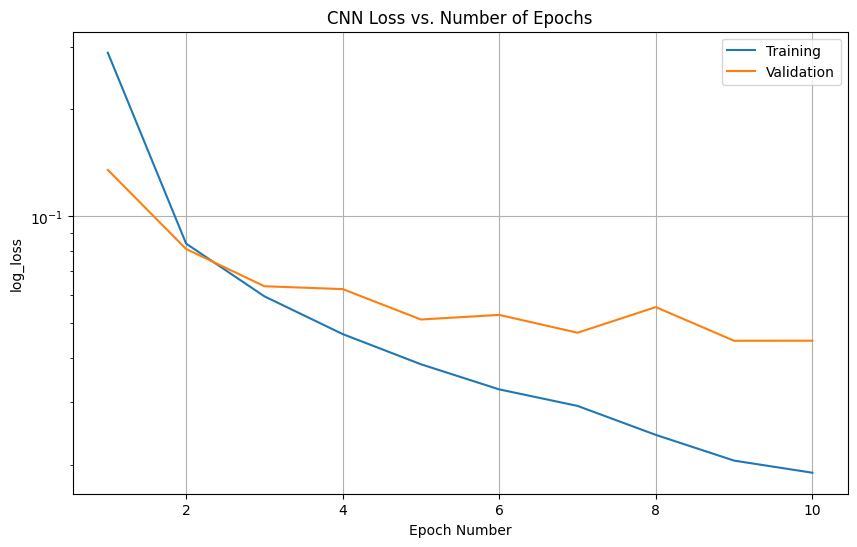

In [24]:
num_epochs = len(cnn_history.history['loss'])
epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, cnn_history.history['loss'], label='Training')
plt.plot(epochs_range, cnn_history.history['val_loss'], label='Validation')
plt.xlabel('Epoch Number')
plt.title('CNN Loss vs. Number of Epochs')
plt.ylabel("log_loss")
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()

**Figure 2:** A plot of the loss value measured by our Training and Validation data after being trained by a Convolution Neural Network (CNN) model. It utilizes sequential convolution layers, ReLu normalization that replaces negative values with zeros, and Max-Pooling which reduces the image size and generalizes the result. As before, 25% of the training data was set aside for validation, and the model was iterated up to 10 times. The loss in both datasets is plotted logarithmically on the y-axis. We can see that the loss value in the Training data decreases significantly over time, but starting with the 3rd epoch we see an increasing amount of overfitting, as seen by the divergence of the Training and Validation data performances.

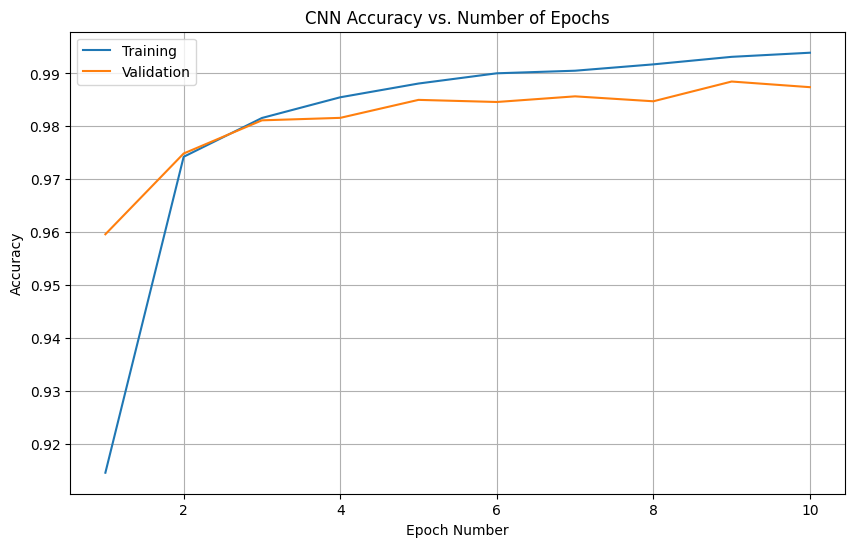

In [25]:
num_epochs = len(cnn_history.history['accuracy'])
epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, cnn_history.history['accuracy'], label='Training')
plt.plot(epochs_range, cnn_history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy vs. Number of Epochs')
plt.legend()
plt.grid(True)
plt.show()

**Figure 3:** A plot of the accuracy value measured by our Training and Validation data after being trained by the same Convolution Neural Network (CNN) model as in Figure 2, with 25% of the training data set aside for validation, and iterated up to 10 times. We can see that see that a high level of accuracy is reached, but that after 3 epochs, a small amount of overfitting stars to occur.

## Convolution Neural Network with Dropout Parameter (Optional):

In [26]:
input_shape = (28, 28, 1) # Define input_shape


model_2 = Sequential([
    Input(shape=input_shape), # Use Input layer as the first layer
    Conv2D(32, kernel_size=(10, 10), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
cnn_history_2 = model_2.fit(x_train, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7115 - loss: 0.8610 - val_accuracy: 0.9677 - val_loss: 0.1088
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9577 - loss: 0.1479 - val_accuracy: 0.9761 - val_loss: 0.0759
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9704 - loss: 0.1010 - val_accuracy: 0.9807 - val_loss: 0.0629
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9757 - loss: 0.0794 - val_accuracy: 0.9811 - val_loss: 0.0612
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9793 - loss: 0.0671 - val_accuracy: 0.9857 - val_loss: 0.0484
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9823 - loss: 0.0573 - val_accuracy: 0.9854 - val_loss: 0.0480
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9859 - loss: 0.0457 - val_accuracy: 0.9862 - val_loss: 0.0437
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9852 - loss: 0.0473 - val_accuracy: 0.

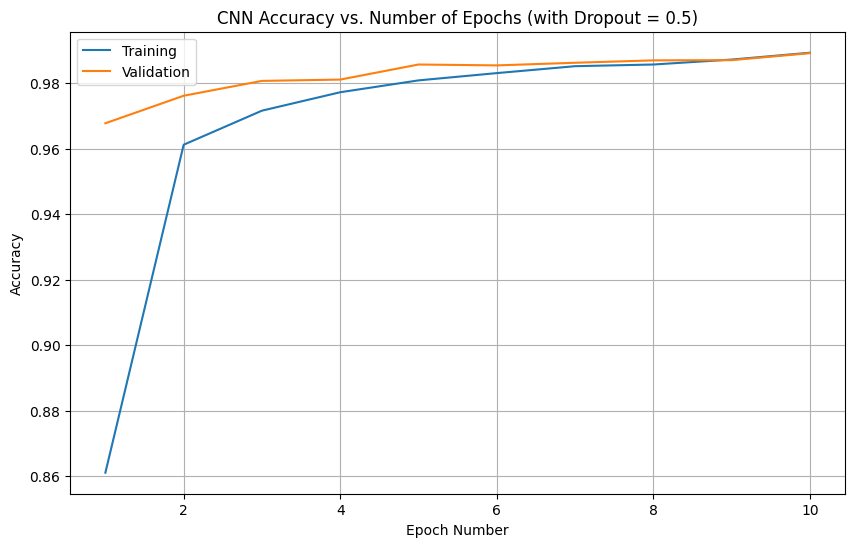

In [28]:
num_epochs = len(cnn_history_2.history['accuracy'])
epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, cnn_history_2.history['accuracy'], label='Training')
plt.plot(epochs_range, cnn_history_2.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy vs. Number of Epochs (with Dropout = 0.5)')
plt.legend()
plt.grid(True)
plt.show()

**Figure 4:** Another plot of the accuracy value measured by our Training and Validation data after being trained by a Convolution Neural Network (CNN) model. A 'Dropout' paramter value of 0.5 has been added. It is a regularization technique that randomly sets 50% of the input units to 0 at each update during training. This helps prevent overfitting, as can be seen in the plot, as compared with Figure 3.